In [2]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer
import torch
from PIL import Image


In [3]:
print(torch.__version__)
#check how many gpus are available
print(torch.cuda.device_count())




1.10.1+cu111
8


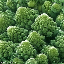

['00000003.png', '00000004.png', '00000006.png', '00000007.png', '00000008.png', '00000009.png', '00000025.png', '00000019.png', '00000020.png', '00000021.png', '00000026.png', '00000027.png', '00000028.png', '00000029.png', '00000031.png', '00000036.png', '00000037.png', '00000032.png', '00000033.png', '00000035.png', '00000040.png', '00000041.png', '00000042.png', '00000044.png', '00000045.png', '00000046.png', '00000047.png', '00000048.png', '00000050.png', '00000051.png', '00000052.png', '00000053.png', '00000054.png', '00000055.png', '00000056.png', '00000058.png', '00000059.png', '00000061.png', '00000064.png', '00000065.png', '00000067.png', '00000069.png', '00000070.png', '00000071.png', '00000072.png', '00000075.png', '00000079.png', '00000080.png', '00000083.png', '00000084.png', '00000085.png', '00000086.png', '00000090.png', '00000091.png', '00000092.png', '00000094.png', '00000096.png', '00000097.png', '00000098.png', '00000102.png', '00000100.png', '00000103.png', '000001

In [3]:
#show first image in /sem-images 64/train with pil
img = Image.open("sem-images 64/train/1.png")
#display it
img.show()

#list all images in /sem-images 64/train
import os
print(os.listdir("sem-images 64/train"))

#find out what directory im in
import os
print(os.getcwd())



In [4]:

model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = False
)

diffusion = GaussianDiffusion(
    model,
    image_size = 64,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 1000    # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
)

trainer = Trainer(
    diffusion,
    'sem-images 64/train',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 1000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    calculate_fid = True,              # whether to calculate fid during training
    num_samples = 25
)

trainer.train()



32
32


KeyboardInterrupt: 

In [5]:

a = torch.tensor([1., 2.], device = 'cuda')
b = torch.tensor([1., 2.], device = 'cuda')


In [9]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.3102, 0.3543, 0.4549],
        [0.2339, 0.9503, 0.0442],
        [0.6154, 0.4704, 0.4078],
        [0.1456, 0.8713, 0.5205],
        [0.2817, 0.9791, 0.5637]])


In [ ]:

pip3 install torch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 pytorch-cuda=11.7 -c torch -c nvidia
